In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
def draw(lines):
    maxc = max(x for x,y in lines)
    maxr = max(y for x,y in lines)
    paper = np.zeros((maxr+1, maxc+1))
    for line in lines:
        c, r = line
        paper[r][c] = 1
    plt.imshow(paper)
    return paper

def fold(lines, fold):
    axis, border = fold
    for i, (c,r) in enumerate(lines):
        if axis == 'x':
            lines[i] = (border - abs(c-border), r)
        else:
            lines[i] = (c, border - abs(r-border))
    return lines



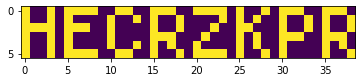

In [49]:
lines, fold_ins = open('input.txt').read().split('\n\n')
lines = [list(map(int, line.split(','))) for line in lines.split('\n')]
folds = []
for i in fold_ins.split('\n'):
    _, _, fold_ins = i.split()
    dim, num = fold_ins.split('=')
    num = int(num)
    folds.append((dim, num))

for f in folds:
    lines = fold(lines, f)          

paper = draw(lines)

In [1]:
lines = []
for line in open('input.txt', 'r'):
    line = line.strip()
    if line.startswith('fold'):
        fold_ins = line.split()[-1]
        dim, num = fold_ins.split('=')
        num = int(num)
        lines = fold(lines, (dim,num))
    else:
        if line:
            lines.append([int(x) for x in line.strip().split(',')])

paper = draw(lines)

NameError: name 'fold' is not defined

In [13]:

from parse import *


In [8]:
file = open('input.txt','r').read()

In [10]:
import re
re.findall(r'(\d+),(\d+)', file)

[('688', '126'),
 ('1237', '406'),
 ('1228', '327'),
 ('827', '189'),
 ('132', '457'),
 ('641', '120'),
 ('1255', '579'),
 ('1310', '187'),
 ('371', '166'),
 ('576', '332'),
 ('1207', '835'),
 ('746', '595'),
 ('468', '5'),
 ('428', '282'),
 ('540', '446'),
 ('1253', '393'),
 ('788', '701'),
 ('1034', '387'),
 ('509', '526'),
 ('209', '360'),
 ('676', '245'),
 ('781', '107'),
 ('515', '301'),
 ('1235', '194'),
 ('83', '304'),
 ('177', '568'),
 ('159', '570'),
 ('141', '583'),
 ('599', '763'),
 ('519', '263'),
 ('261', '260'),
 ('18', '281'),
 ('870', '688'),
 ('1190', '598'),
 ('1287', '169'),
 ('616', '351'),
 ('89', '488'),
 ('23', '725'),
 ('338', '204'),
 ('641', '792'),
 ('693', '577'),
 ('1278', '768'),
 ('739', '304'),
 ('749', '565'),
 ('1096', '742'),
 ('504', '621'),
 ('900', '103'),
 ('627', '11'),
 ('1272', '543'),
 ('281', '491'),
 ('1185', '129'),
 ('1293', '526'),
 ('917', '701'),
 ('781', '395'),
 ('1005', '264'),
 ('843', '67'),
 ('930', '812'),
 ('967', '746'),
 ('116

In [19]:
file = open('input.txt','r').read()
search('{:d},{:d}', file).named

{}

In [25]:
a = 'hoi ik ben een vliegtuig'
dict(findall('hoi ik ben {voertuig}', a))

ValueError: dictionary update sequence element #0 has length 0; 2 is required